In [ ]:
# A Digit Recognizer, based on MNIST dataset using Neural network classifier, for handwritten digits (0-9).

In [7]:
!pip install tensorflow numpy matplotlib scikit-learn seaborn scipy

Attempting to load MNIST dataset...
Dataset loaded successfully.

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10


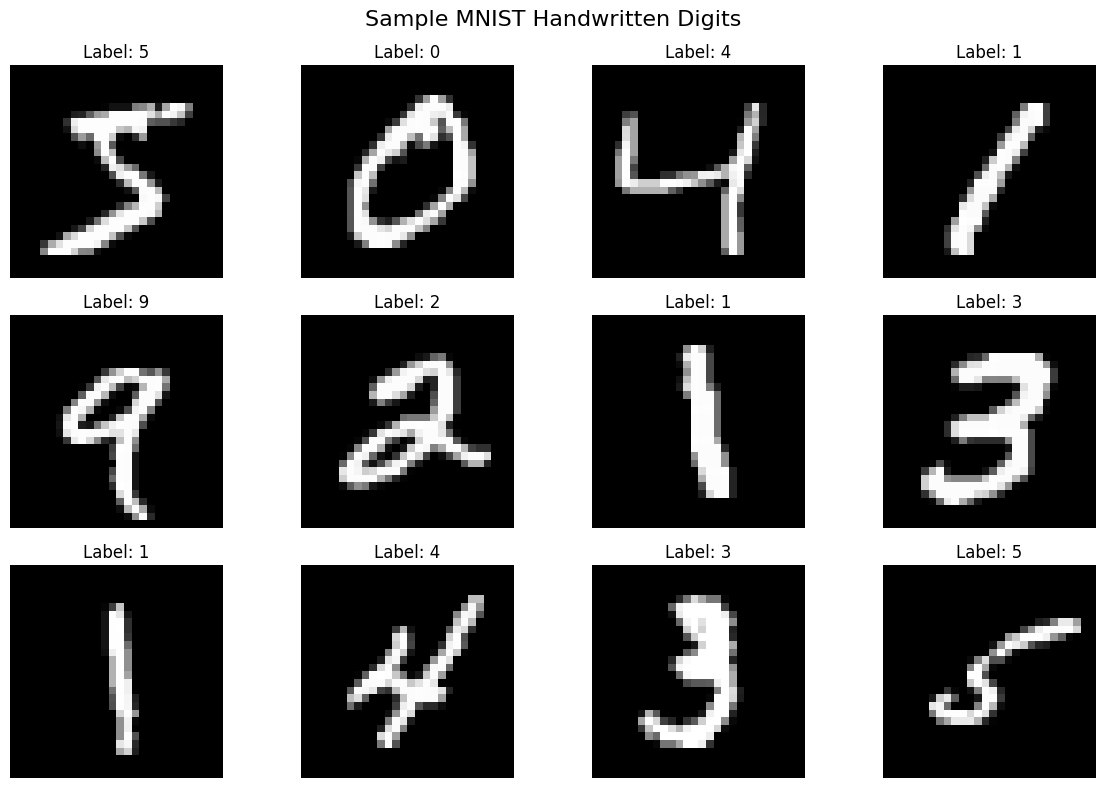


Preprocessing data...
Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)
Categorical labels shape: (60000, 10)

Building neural network model...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Compiling the model...

Training the model...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7720 - loss: 0.7533 - val_accuracy: 0.9471 - val_loss: 0.1821
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9435 - loss: 0.1921 - val_accuracy: 0.9601 - val_loss: 0.1339
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9581 - loss: 0.1431 - val_accuracy: 0.9647 - val_loss: 0.1137
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9661 - loss: 0.1131 - val_accuracy: 0.9695 - val_loss: 0.0988
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.0943 - val_accuracy: 0.9701 - val_loss: 0.0946
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0798 - val_accuracy: 0.9735 - val_loss: 0.0873
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9774 - loss: 0.0709 - val_accuracy: 0.9748 - val_loss: 0.0833
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc

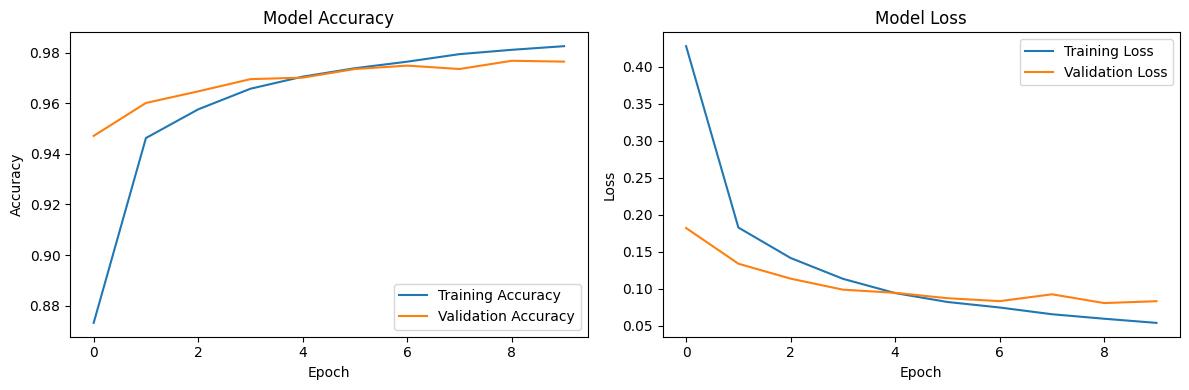


Evaluating the model on test data...
Test Loss: 0.0729
Test Accuracy: 0.9785
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.96      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



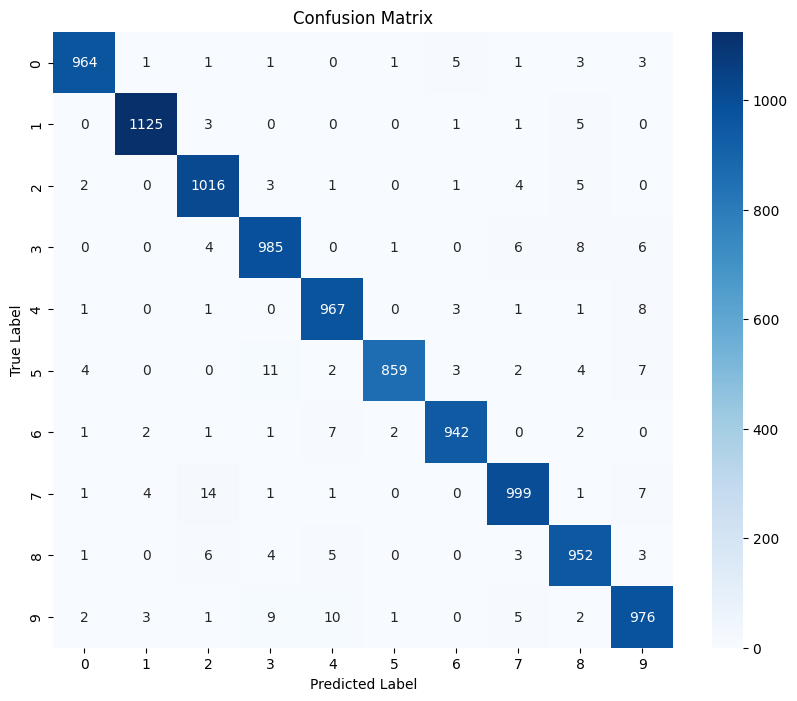


Making predictions and visualizing results...


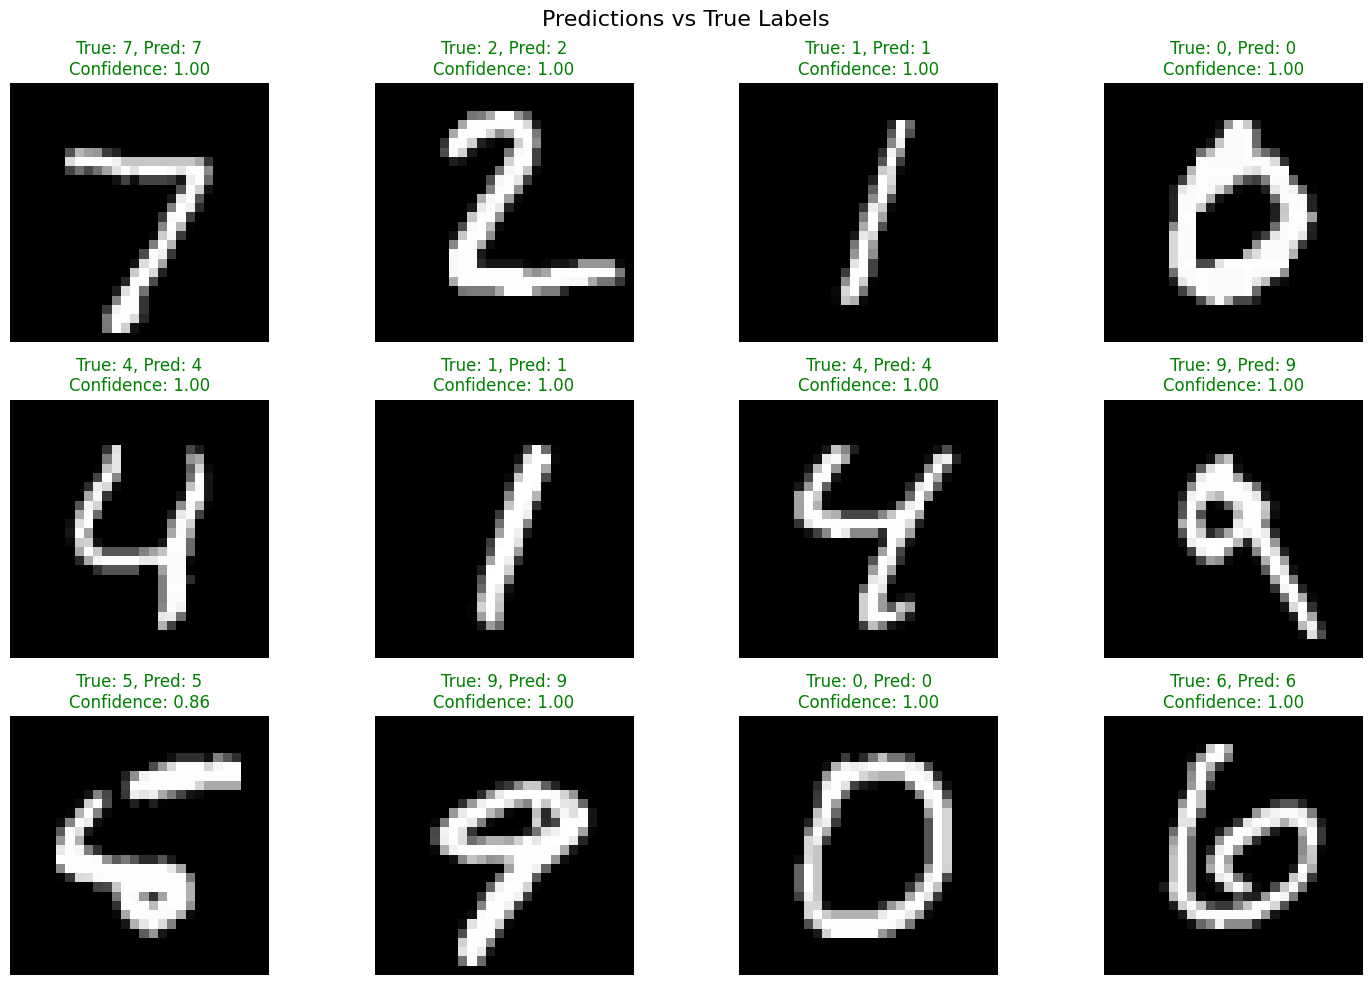


Finding misclassified examples...
Number of misclassified examples: 215

Showing first 12 misclassified examples:


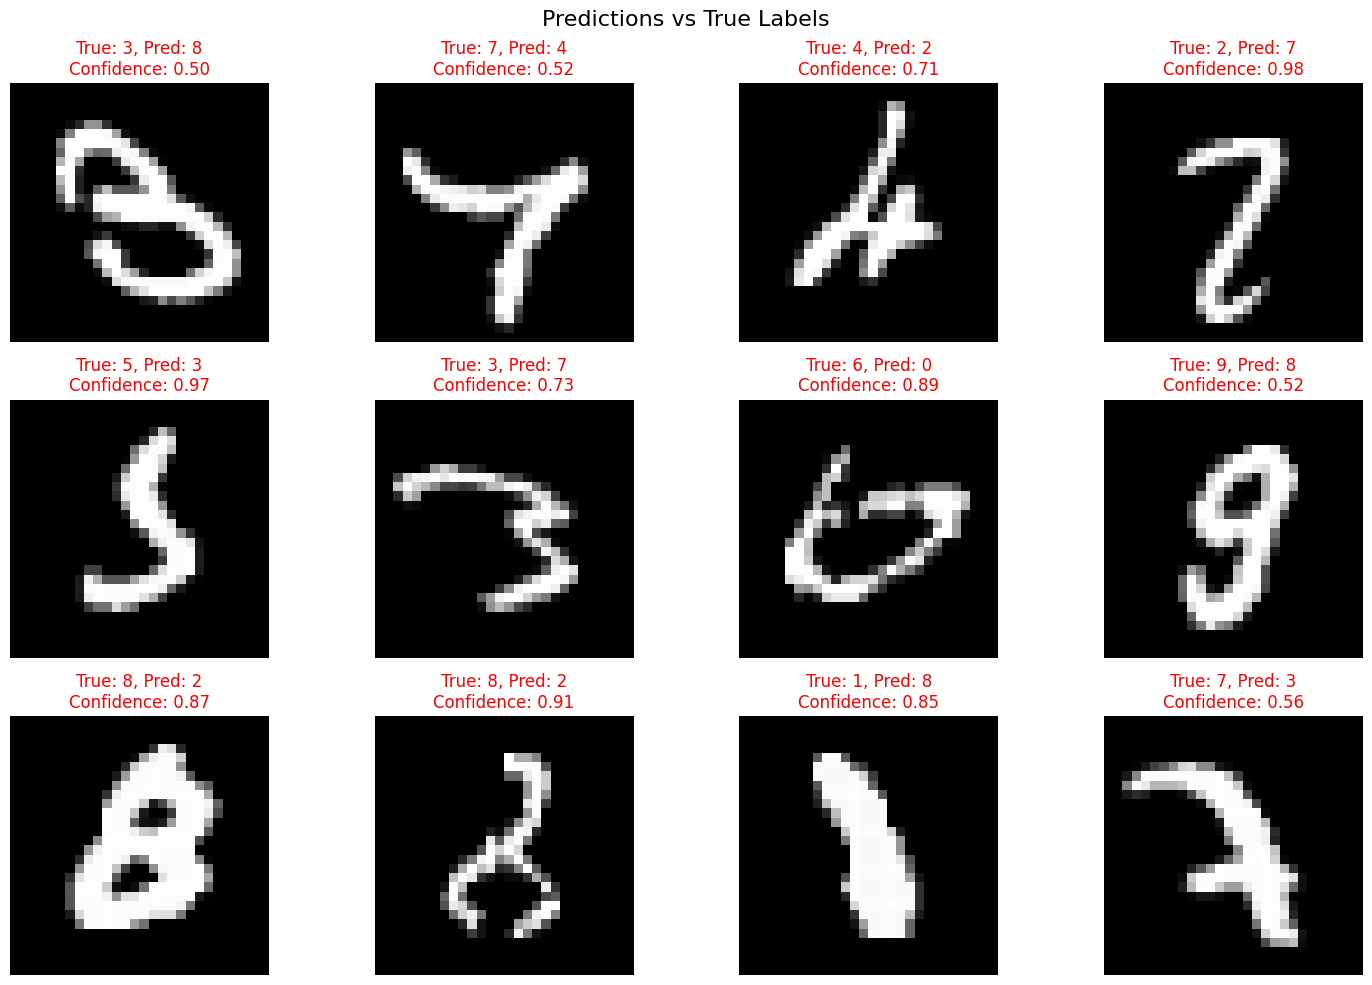


Example prediction for a single digit:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


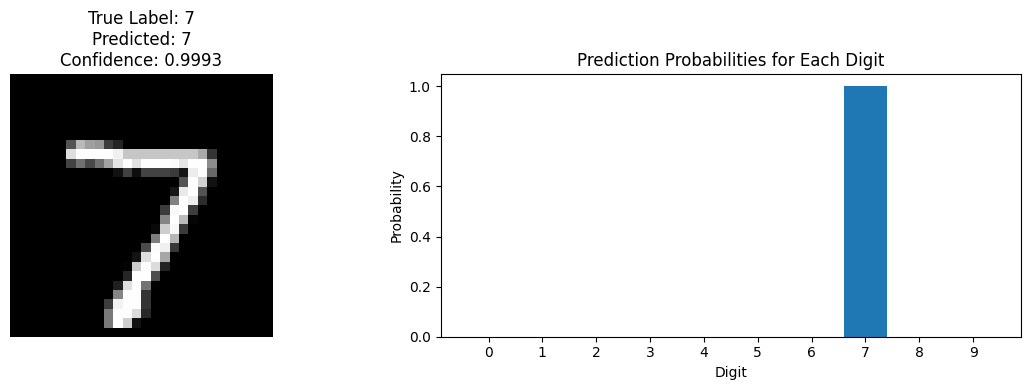

Final Model Summary: 

Test Accuracy: 0.9785 (97.85%)
Test Loss: 0.0729
Total test samples: 10000
Correctly classified: 9785
Misclassified: 215


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import ssl
import urllib.request
def fix_ssl_and_load_mnist():
    try:
        print("Attempting to load MNIST dataset...")
        (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
        print("Dataset loaded successfully.\n")
        return (x_train, y_train), (x_test, y_test)
    except Exception as e:
        print(f"SSL Error encountered: {str(e)[:100]}...")
        print("Applying SSL certificate fix...")
        ssl_context = ssl.create_default_context()
        ssl_context.check_hostname = False
        ssl_context.verify_mode = ssl.CERT_NONE
        https_handler = urllib.request.HTTPSHandler(context=ssl_context)
        opener = urllib.request.build_opener(https_handler)
        urllib.request.install_opener(opener)
        try:
            (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
            print("Dataset loaded successfully with SSL fix.")
            return (x_train, y_train), (x_test, y_test)
        except Exception as e2:
            print(f"Still having issues: {str(e2)[:100]}...")
            print("Trying alternative method with manual download...")
            return load_mnist_alternative()
def load_mnist_alternative():
    try:
        from sklearn.datasets import load_digits
        print("Loading sklearn digits dataset as alternative...")
        digits = load_digits()
        x_data = digits.images
        y_data = digits.target
        split_idx = int(0.8 * len(x_data))
        x_train = x_data[:split_idx]
        y_train = y_data[:split_idx]
        x_test = x_data[split_idx:]
        y_test = y_data[split_idx:]        
        from scipy.ndimage import zoom
        x_train_resized = np.array([zoom(img, 28/8) for img in x_train])
        x_test_resized = np.array([zoom(img, 28/8) for img in x_test])
        print("Alternative dataset loaded successfully.")
        print("Note: Using sklearn digits dataset (8x8 resized to 28x28).")
        return (x_train_resized, y_train), (x_test_resized, y_test)
    except ImportError:
        print("sklearn not available. Creating synthetic data...")
        return create_synthetic_mnist()
def create_synthetic_mnist():
    print("Creating synthetic MNIST-like data for demonstration...")
    x_train = np.random.rand(6000, 28, 28) * 0.3
    y_train = np.random.randint(0, 10, 6000)
    x_test = np.random.rand(1000, 28, 28) * 0.3
    y_test = np.random.randint(0, 10, 1000)
    for i in range(len(x_train)):
        digit = y_train[i]
        if digit == 0:
            x_train[i][8:20, 8:12] = 0.8
            x_train[i][8:20, 16:20] = 0.8
            x_train[i][8:12, 8:20] = 0.8
            x_train[i][16:20, 8:20] = 0.8
        elif digit == 1:
            x_train[i][6:22, 12:16] = 0.8
    print("Synthetic data created.")    
    return (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = fix_ssl_and_load_mnist()
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Handwritten Digits', fontsize=16)
plt.tight_layout()
plt.show()
print("\nPreprocessing data...")
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train_flattened = x_train.reshape(x_train.shape[0], 28 * 28)
x_test_flattened = x_test.reshape(x_test.shape[0], 28 * 28)
print(f"Flattened training data shape: {x_train_flattened.shape}")
print(f"Flattened test data shape: {x_test_flattened.shape}")
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)
print(f"Categorical labels shape: {y_train_categorical.shape}")
print("\nBuilding neural network model...")
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),    
    layers.Dropout(0.2),    
    layers.Dense(64, activation='relu'),    
    layers.Dense(10, activation='softmax')
])
model.summary()
print("\nCompiling the model...")
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("\nTraining the model...")
history = model.fit(
    x_train_flattened, 
    y_train_categorical,
    batch_size=128,
    epochs=10,
    validation_split=0.2,
    verbose=1
)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
print("\nEvaluating the model on test data...")
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test_categorical, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
y_pred = model.predict(x_test_flattened)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("\nMaking predictions and visualizing results...")
def display_predictions(images, true_labels, predictions, n_samples=12):
    plt.figure(figsize=(15, 10))
    for i in range(n_samples):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        predicted_label = np.argmax(predictions[i])
        true_label = true_labels[i]
        confidence = np.max(predictions[i])        
        color = 'green' if predicted_label == true_label else 'red'
        plt.title(f'True: {true_label}, Pred: {predicted_label}\nConfidence: {confidence:.2f}', 
                 color=color)
        plt.axis('off')
    plt.suptitle('Predictions vs True Labels', fontsize=16)
    plt.tight_layout()
    plt.show()
display_predictions(x_test[:12], y_test[:12], y_pred[:12])
print("\nFinding misclassified examples...")
misclassified_indices = np.where(y_pred_classes != y_test)[0]
print(f"Number of misclassified examples: {len(misclassified_indices)}")
if len(misclassified_indices) > 0:
    n_show = min(12, len(misclassified_indices))
    misclassified_images = x_test[misclassified_indices[:n_show]]
    misclassified_true = y_test[misclassified_indices[:n_show]]
    misclassified_pred = y_pred[misclassified_indices[:n_show]]
    print(f"\nShowing first {n_show} misclassified examples:")
    display_predictions(misclassified_images, misclassified_true, misclassified_pred, n_show)
def predict_digit(image_index):
    image = x_test[image_index]
    true_label = y_test[image_index]
    prediction = model.predict(x_test_flattened[image_index:image_index+1])
    predicted_class = np.argmax(prediction[0])
    confidence = np.max(prediction[0])    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True Label: {true_label}\nPredicted: {predicted_class}\nConfidence: {confidence:.4f}')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.bar(range(10), prediction[0])
    plt.xlabel('Digit')
    plt.ylabel('Probability')
    plt.title('Prediction Probabilities for Each Digit')
    plt.xticks(range(10))
    plt.tight_layout()
    plt.show()
    return predicted_class, confidence
print("\nExample prediction for a single digit:")
predict_digit(0)
print("Final Model Summary: \n")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")
print(f"Total test samples: {len(y_test)}")
print(f"Correctly classified: {np.sum(y_pred_classes == y_test)}")
print(f"Misclassified: {np.sum(y_pred_classes != y_test)}")